In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_theme(style='whitegrid')

# Load Data
Raw, target = datasets.load_iris(return_X_y=True, as_frame = True)
Raw.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 3D Scatter Plot

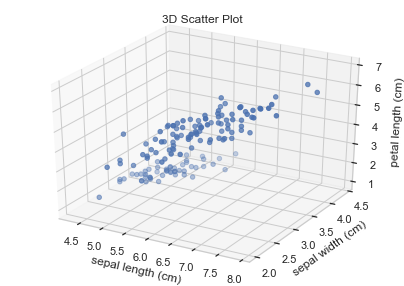

In [2]:
x = Raw["sepal length (cm)"].values
y = Raw["sepal width (cm)"].values
z = Raw["petal length (cm)"].values

# 3D plot of the regressor and regressand
fig = plt.figure()
fig.set_figwidth(7)
fig.set_figheight(5)
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3D Scatter Plot")
ax.scatter3D(x, y, z)
ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.set_zlabel("petal length (cm)")
plt.show()

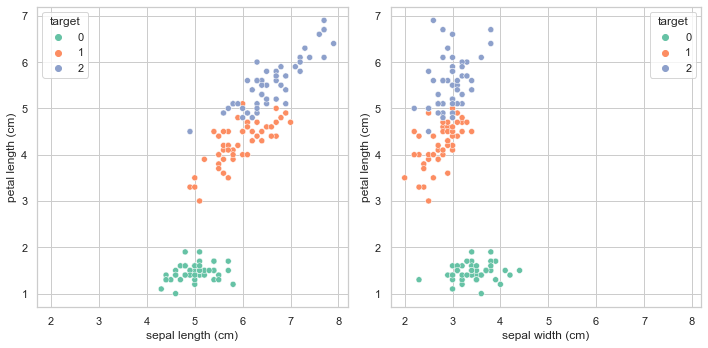

In [3]:
# Take only relevant features, i.e. sepal length, width and for y = petal_length
y = Raw[['petal length (cm)']]
X = Raw[['sepal length (cm)', 'sepal width (cm)']]

# Fig settings
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figwidth(10)
fig.set_figheight(5)
# Axis 1
sns.scatterplot(x=X['sepal length (cm)'], y=y['petal length (cm)'], ax=ax1, hue=target, palette="Set2")
# Axis 2
sns.scatterplot(x=X['sepal width (cm)'], y=y['petal length (cm)'], ax=ax2, hue=target, palette="Set2")
fig.tight_layout()
plt.show()

# Multiple Linear Regression

$$ Y = X\beta + U $$

here: $Y= \text{petal_length}$ and $X = \text{(sepal_length, sepal_width)}$.

Notice that:
$$ \hat{\beta} = (X'X)^{-1}X'Y $$
with assumption that:
- $X$ has full rank
- $(X'X)$ has inverse $(X'X)^{-1}$ $\Leftrightarrow det(X'X) \neq 0$

Vector of the fitted y-values:
$$ \hat{Y} = X\hat{\beta} $$

Vector of the empirical residuals:
$$ \hat{U} = Y - X\hat{\beta} $$

## LR using Scikit-learn
Does automatically add the one-column to $X$ in order to have an inhomogenous regression model and an intercept

In [4]:
# Computing with scikit learn
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X=X, y=y)

Intercept = [-2.52476151]
Beta_hat = [[ 1.77559255 -1.33862329]]
Rank of X = 2
Number of input features = 2


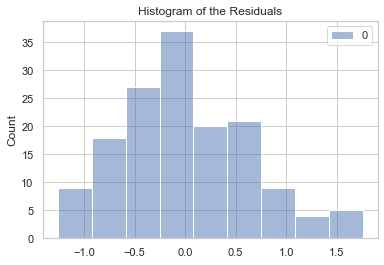

In [5]:
print(f"Intercept = {reg.intercept_}")
print(f"Beta_hat = {reg.coef_}")
print(f"Rank of X = {reg.rank_}")
print(f"Number of input features = {reg.n_features_in_}")

# Get Residuals
y_pred = reg.predict(X)
residuals = y.values - y_pred

plt.title("Histogram of the Residuals")
sns.histplot(residuals)
plt.show()

## LR using statsmodels.api.OLS
Does not automatically add the one-column to $X$, i.e. its an homogenous regression model.

In [13]:
from statsmodels.api import OLS
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     482.0
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           2.74e-65
Time:                        09:40:44   Log-Likelihood:                -145.89
No. Observations:                 150   AIC:                             297.8
Df Residuals:                     147   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5248      0.563     -4.481      0.0

## LR from scratch (Dozent nahm sm.OLS Library)
The first column in $X$ has to be a one-column in order to get a inhomogenous model (has intercept).

In [7]:
# Insert One Column to df
X.insert(loc=0, column="ones", value=np.ones(X.shape[0]))
X.head(5)

,ones,sepal length (cm),sepal width (cm)
0,1.0,5.1,3.5
1,1.0,4.9,3.0
2,1.0,4.7,3.2
3,1.0,4.6,3.1
4,1.0,5.0,3.6


In [8]:
# Convert to numpy
X = np.array(X)
y = np.array(y)
print(type(X))
print(f"Shape of ndarray X = {X.shape}")

# BETA_HAT = (X'X)^-1 X'Y
BETA_HAT = np.linalg.inv(((X.T).dot(X))).dot((X.T).dot(y))
print(f"BETA_HAT = \n{BETA_HAT}")

<class 'numpy.ndarray'>
Shape of ndarray X = (150, 3)
BETA_HAT = 
[[-2.52476151]
 [ 1.77559255]
 [-1.33862329]]


In [9]:
# Y_HAT = X*BETA_HAT
Y_HAT = X.dot(BETA_HAT)
print(f"First 10 Y_HAT = \n{Y_HAT[: 10]}")

First 10 Y_HAT = 
[[1.84557896]
 [2.1597721 ]
 [1.53692893]
 [1.49323201]
 [1.53415738]
 [1.84280741]
 [1.09164502]
 [1.80188204]
 [1.40583816]
 [2.02590977]]


First 5 Residuals = 
[[-0.44557896]
 [-0.7597721 ]
 [-0.23692893]
 [ 0.00676799]
 [-0.13415738]]


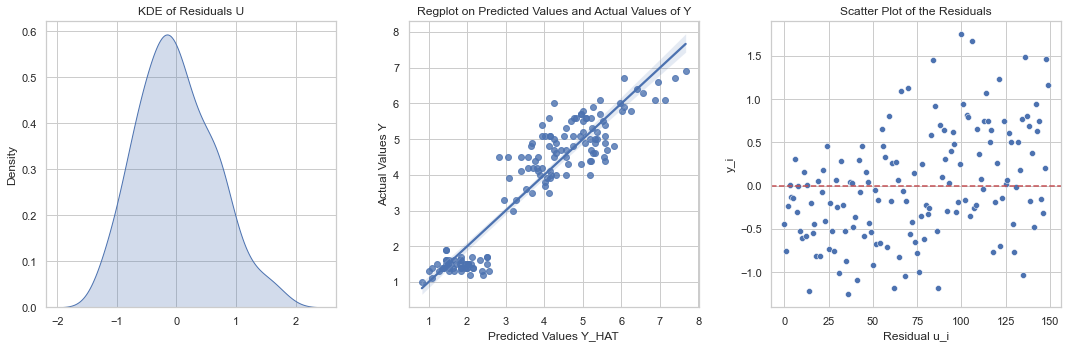

In [10]:
# RESIDUALS = U = Y - Y_HAT
RESIDUALS = np.array(y) - Y_HAT
print(f"First 5 Residuals = \n{RESIDUALS[: 5]}")

# Plot Settings
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(15)
fig.set_figheight(5)
# Axis 1
sns.kdeplot(RESIDUALS.flatten(), fill=True, ax=ax1)
ax1.set_title("KDE of Residuals U")
# Axis 2
sns.regplot(x=Y_HAT.flatten(), y=y.flatten(), ax=ax2)
sns.lineplot()
ax2.set_title("Regplot on Predicted Values and Actual Values of Y")
ax2.set_xlabel("Predicted Values Y_HAT")
ax2.set_ylabel("Actual Values Y")
# Axis 3
#sns.scatterplot(x = np.arange(0, len(y), 1), y = RESIDUALS.flatten(), ax=ax3)
sns.scatterplot(x = np.arange(0, len(RESIDUALS.flatten())), y = RESIDUALS.flatten(), ax=ax3)
## Add horizontal line
plt.axhline(y=0, color='r', linestyle='--')
ax3.set_title("Scatter Plot of the Residuals")
ax3.set_xlabel("Residual u_i")
ax3.set_ylabel("y_i")
fig.tight_layout()
fig.savefig("residual_analysis.svg", dpi=128)
plt.show()

In [11]:
# X'*U = X'*RESIDUALS = 0
print(f"Shape of X transposed: {(X.T).shape}")
print(f"Shape of U: {RESIDUALS.shape}")
print("Computing X' * U = ")
np.around((X.T).dot(RESIDUALS), 2)

Shape of X transposed: (3, 150)
Shape of U: (150, 1)
Computing X' * U = 


array([[0.],
       [0.],
       [0.]])

# Learning Signifikanztest
Signifikanztest mit Niveau $\alpha$ ist definiert als:
$$ T = \frac{\hat{\beta}_i}{\sqrt{{\hat{\sigma}^2}q_{ii}}}  \text{ distributed as } t_{n-K}^{1-\frac{1}{\alpha}} $$

+ Mit $q_{ii}$ das $i$-te Diagonalelement von: $Q=(X'X)^{-1}$
+ $\hat{\beta_i}$ die $i$-te Kompononte von $\hat{\beta}$

In [12]:
# Compute Q
Q = np.linalg.inv(((X.T).dot(X)))

# Variance of Residuals
variance_of_residuals = (1/(len(RESIDUALS) - len(BETA_HAT))) * ((RESIDUALS.T) @ RESIDUALS)

# Test for beta_2, i.e. sepal_length
variance_of_b2 = variance_of_residuals * Q[1, 1]
std_of_b2 = np.sqrt(variance_of_b2)

print(f"Variance of all Residuals = {variance_of_residuals}")

t_value_of_b2 = BETA_HAT[1] / std_of_b2
print(f"T-Value of B2 = {t_value_of_b2}")

Variance of all Residuals = [[0.41793705]]
T-Value of B2 = [[27.56916042]]
